In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:

df = pd.read_csv("/content/fish.csv")


In [31]:
df

,"Species,Weight,Length1,Length2,Length3,Height,Width"
0,"Bream,242,23.2,25.4,30,11.52,4.02"
1,"Bream,290,24,26.3,31.2,12.48,4.3056"
2,"Bream,340,23.9,26.5,31.1,12.3778,4.6961"
3,"Bream,363,26.3,29,33.5,12.73,4.4555"
4,"Bream,430,26.5,29,34,12.444,5.134"
...,...
154,"Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936"
155,"Smelt,13.4,11.7,12.4,13.5,2.43,1.269"
156,"Smelt,12.2,12.1,13,13.8,2.277,1.2558"
157,"Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672"


In [7]:
df.shape

(159, 7)

In [8]:
columnames = df.columns
columnames

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [9]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [10]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [11]:
df.nunique()

Species      7
Weight     101
Length1    116
Length2     93
Length3    124
Height     154
Width      152
dtype: int64

In [12]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [13]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [17]:
# Let's create model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = df.iloc[:,1:]
y = df.iloc[:,0]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=48)

     Weight  Length1  Length2  Length3   Height   Width
0     242.0     23.2     25.4     30.0  11.5200  4.0200
1     290.0     24.0     26.3     31.2  12.4800  4.3056
2     340.0     23.9     26.5     31.1  12.3778  4.6961
3     363.0     26.3     29.0     33.5  12.7300  4.4555
4     430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...      ...      ...      ...      ...     ...
154    12.2     11.5     12.2     13.4   2.0904  1.3936
155    13.4     11.7     12.4     13.5   2.4300  1.2690
156    12.2     12.1     13.0     13.8   2.2770  1.2558
157    19.7     13.2     14.3     15.2   2.8728  2.0672
158    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 6 columns]
0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object


In [19]:
model = LogisticRegression()

In [20]:
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
y_pred = model.predict(x_test)

In [22]:
y_pred

array(['Perch', 'Roach', 'Perch', 'Smelt', 'Smelt', 'Perch', 'Perch',
       'Smelt', 'Pike', 'Pike', 'Perch', 'Roach', 'Bream', 'Perch',
       'Smelt', 'Roach', 'Perch', 'Perch', 'Roach', 'Bream', 'Roach',
       'Pike', 'Bream', 'Bream', 'Perch', 'Perch', 'Perch', 'Pike',
       'Roach', 'Bream', 'Perch', 'Bream'], dtype=object)

In [28]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

print("Accuracy: {:.2f}%".format(accuracy*100))



Accuracy: 75.00%


Text(0.5, 1.0, 'Confusion Matrix')

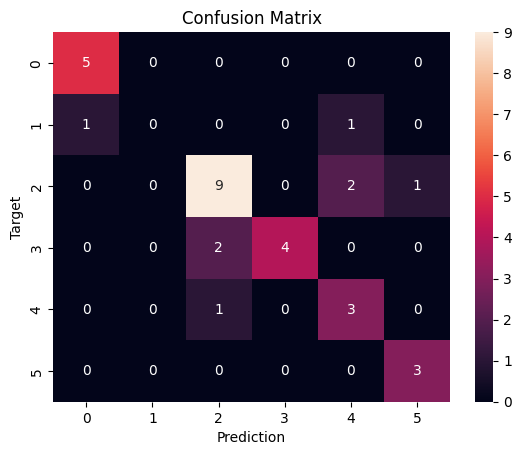

In [29]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

